
Perform K-Means,Hierarchical and DBSCAN Clustering for the airlines data to obtain optimum number of clusters. 
Also Visualise the results.

Data Description:
 
The file EastWest.csv data contains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers.

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not.


### Problem Definition
    Perform K-Means,Hierarchical and DBSCAN Clustering for the airlines data to obtain optimum number of clusters. 
    Also Visualise the results.

In [ ]:
### import required packages

In [130]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

### Load the data

In [131]:
df = pd.read_csv("EastWest .csv")
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [132]:
df.drop('ID#', axis=1, inplace=True)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [134]:
df.corr()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
Balance,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909
Days_since_enroll,0.263129,0.017312,0.230849,-0.005807,0.010832,0.210397,0.161262,0.037271,0.059260,1.000000,0.188121


In [135]:
df = df.drop(['cc2_miles', 'cc3_miles','Qual_miles'], axis=1)

In [136]:
df.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,1,174,1,0,0,7000,0
1,19244,1,215,2,0,0,6968,0
2,41354,1,4123,4,0,0,7034,0
3,14776,1,500,1,0,0,6952,0
4,97752,4,43300,26,2077,4,6935,1


In [137]:
from sklearn.preprocessing import StandardScaler
# scaling_features = df.drop('Award?',axis=1)
# dependent_feature = df['Award?']
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [138]:
scaled_features = scaler.transform(df)

In [139]:
df_scaled = pd.DataFrame(scaled_features,columns=['Balance', 'cc1_miles', 'Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll' ,'Award?'])

In [140]:
df_scaled.head()

,Balance,cc1_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,-0.769578,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.769578,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.769578,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.769578,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,1.409471,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [141]:
clusters =4
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=clusters, random_state=123456)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=123456)

In [143]:
columns = df_scaled.columns
columns[0]

'Balance'

In [144]:
kmeans.labels_

array([3, 3, 3, ..., 0, 3, 3])

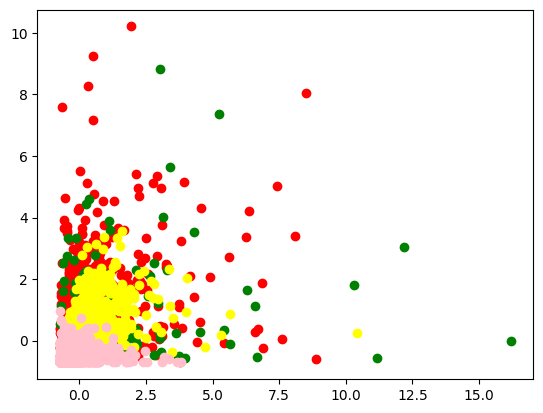

In [146]:
colors = ["red", "green", "yellow", "pink", "black", "blue"]
for cluster in range(clusters):
    plt.scatter(
        df_scaled['Balance'][kmeans.labels_ == cluster], 
        df_scaled['Bonus_miles'][kmeans.labels_ == cluster],
        color = colors[cluster]
    )

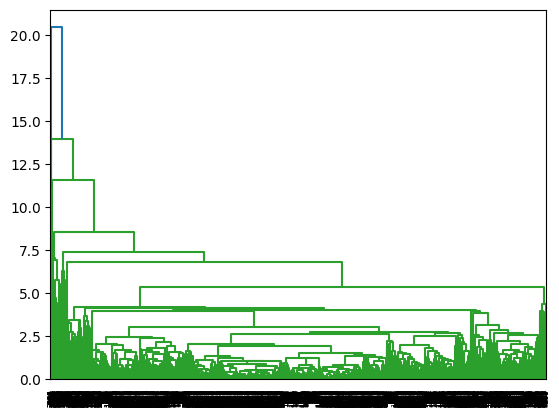

In [150]:
from scipy.cluster import hierarchy
linkage = hierarchy.linkage(df_scaled,method='average')
dendrogram = hierarchy.dendrogram(linkage)

In [151]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=3)
dbscan.fit(df_scaled)

DBSCAN(min_samples=3)

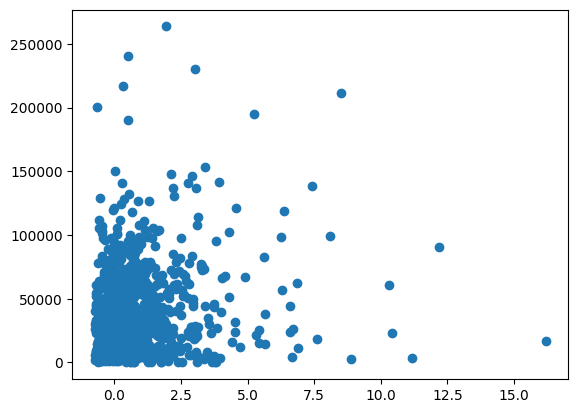

In [152]:
plt.scatter(df_scaled['Balance'][dbscan.labels_ == -1], df['Bonus_miles'][dbscan.labels_ == -1])